In [65]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# Load csv
df=pd.read_csv("https://raw.githubusercontent.com/sdhilip200/Content-Based-Recommendation---Good-Reads-data/master/data.csv")

In [134]:
df.head(10)

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title,cleaned,Desc1,cleaned1
0,0,We know that power is shifting From West to Ea...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...,know power shifting west east north south pres...,We know that power is shifting From West to Ea...,we know that power is shifting from west to ea...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t...",following success accidental billionaires mone...,Following the success of The Accidental Billio...,following the success of the accidental billio...
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...,tap power social software networks build busin...,How to tap the power of social software and ne...,how to tap the power of social software and ne...
3,3,William J Bernstein is an American financial t...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing,william j bernstein american financial theoris...,William J Bernstein is an American financial t...,william j bernstein is an american financial t...
4,4,Amazing book And I joined Steve Jobs and many ...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony,amazing book joined steve jobs many akio morit...,Amazing book And I joined Steve Jobs and many ...,amazing book and i joined steve jobs and many ...
5,5,In the tradition of Phil Knights Shoe Dog come...,5.0,Marc Randolph,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.28,That Will Never Work: The Birth of Netflix and...,tradition phil knights shoe dog comes incredib...,In the tradition of Phil Knights Shoe Dog come...,in the tradition of phil knights shoe dog come...
6,6,Gregory Zuckerman the bestselling author of Th...,6.0,Gregory Zuckerman,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.12,The Man Who Solved the Market: How Jim Simons ...,gregory zuckerman bestselling author greatest ...,Gregory Zuckerman the bestselling author of Th...,gregory zuckerman the bestselling author of th...
7,7,From bestselling writer David Graeber a powerf...,7.0,David Graeber,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.95,Bullshit Jobs: A Theory,bestselling writer david graeber powerful argu...,From bestselling writer David Graeber a powerf...,from bestselling writer david graeber a powerf...
8,8,You aspire to lead with greater impact The pro...,8.0,Herminia Ibarra,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.91,"Act Like a Leader, Think Like a Leader",aspire lead greater impact problem youre busy ...,You aspire to lead with greater impact The pro...,you aspire to lead with greater impact the pro...
9,9,Entrepreneurs often suffer from superhero synd...,9.0,Chris C. Ducker,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.92,Virtual Freedom: How to Work with Virtual Staf...,entrepreneurs often suffer superhero syndromet...,Entrepreneurs often suffer from superhero synd...,entrepreneurs often suffer from superhero synd...


In [68]:
df.shape

(2382, 8)

In [69]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [82]:
# remove, ascii, lower, stopwords, html, puntuation

def remove_puntuation(df):
     df['Desc'] = df['Desc'].str.replace('[^\w\s]','')
     return df

def remove_stop_words(df):
    stop_words = set(stopwords.words("english"))
    df["cleaned"] = df["Desc"].str.lower().str.split()
    df["cleaned"] = df["cleaned"].apply(lambda x: [word for word in x if word not in stop_words])
    return df['cleaned']

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r''. text)

In [84]:
df = remove_puntuation(df)

df['cleaned'] = remove_stop_words(df)

In [100]:
#Utitlity functions for removing ASCII characters, converting lower case, removing stop words, html and punctuation from description
#def _removeNonAscii(s):
#    return "".join(i for i in s if  ord(i)<128)

#def make_lower_case(text):
#    return text.lower()

#def remove_stop_words(text):
#    text = text.split()
#    stops = set(stopwords.words("english"))
#    text = [w for w in text if not w in stops]
#    text = " ".join(text)
#    return text

#def remove_html(text):
#    html_pattern = re.compile('<.*?>')
#    return html_pattern.sub(r'', text)

#def remove_punctuation(text):
#    tokenizer = RegexpTokenizer(r'\w+')
#    text = tokenizer.tokenize(text)
#    text = " ".join(text)
#    return text
    
#df['Desc'] = df['Desc'].astype(str)

#df['cleaned'] = df['Desc'].apply(_removeNonAscii)

#df['cleaned'] = df.cleaned.apply(func = make_lower_case)
#df['cleaned'] = df.cleaned.apply(func = remove_stop_words)
#df['cleaned'] = df.cleaned.apply(func=remove_punctuation)
#df['cleaned'] = df.cleaned.apply(func=remove_html)

### Building Average Word2Vec Model

In [95]:
df['cleaned']

0       [know, power, shifting, west, east, north, sou...
1       [following, success, accidental, billionaires,...
2       [tap, power, social, software, networks, build...
3       [william, j, bernstein, american, financial, t...
4       [amazing, book, joined, steve, jobs, many, aki...
                              ...                        
2377    [ralph, roberts, sus, setenta, años, tras, la,...
2378    [murder, vicarage, marks, debut, agatha, chris...
2379    [1951, john, wyndham, published, novel, day, t...
2380    [classic, book, revealed, flannery, oconnor, o...
2381    [imbued, every, page, frank, mccourts, astound...
Name: cleaned, Length: 2382, dtype: object

In [86]:
EMBEDDING_FILE = './GoogleNews-vectors-negative300.bin.gz'
google_word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [98]:
#splitting the description into words

i = 0
corpus = []
for words in df['cleaned']:
    corpus.append(words)

In [104]:
# Training our corpus with Google Pretrained Model

google_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
google_model.build_vocab(corpus)

#model.intersect_word2vec_format('./word2vec/GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)

google_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

google_model.train(corpus, total_examples=google_model.corpus_count, epochs = 5)

(0, 0)

In [107]:
google_model.wv.most_similar(positive=["software"])

[('hardware', 0.6266817450523376),
 ('computer', 0.5444108843803406),
 ('technology', 0.5341452360153198),
 ('programmers', 0.5173160433769226),
 ('systems', 0.5165870785713196),
 ('apps', 0.5101228356361389),
 ('server', 0.5100924372673035),
 ('opensource', 0.5096932649612427),
 ('browser', 0.5036185383796692),
 ('enterprise', 0.49375954270362854)]

In [153]:
google_model.wv.most_similar(positive=["book"], negative=["novella"])

[('books', 0.4123399257659912),
 ('handbook', 0.31808310747146606),
 ('textbook', 0.2988455295562744),
 ('ins', 0.2653692662715912),
 ('guide', 0.25104665756225586),
 ('guidebook', 0.24198904633522034),
 ('copies', 0.24041274189949036),
 ('paper', 0.2394215166568756),
 ('bible', 0.23603373765945435),
 ('workbook', 0.23579613864421844)]

In [110]:
google_model.wv.most_similar(positive=["classic", "social"], topn=5)

[('contemporary', 0.5084421038627625),
 ('archetypal', 0.5080585479736328),
 ('timeless', 0.4978335201740265),
 ('classics', 0.4954316020011902),
 ('quintessential', 0.49491429328918457)]

In [111]:
google_model.wv.most_similar(positive=["años"])

[('ellos', 0.7888968586921692),
 ('hecho', 0.7741894721984863),
 ('desde', 0.7631752490997314),
 ('sido', 0.7607066631317139),
 ('está', 0.7589589357376099),
 ('más', 0.7331973314285278),
 ('este', 0.7297638058662415),
 ('haber', 0.7282924056053162),
 ('ciudad', 0.7213833928108215),
 ('vuelve', 0.7160329818725586)]

In [166]:
from sklearn.manifold import TSNE

In [167]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


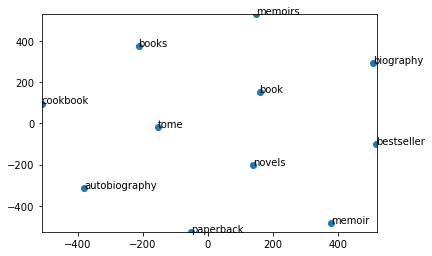

In [172]:
display_closestwords_tsnescatterplot(google_model,'book')

In [184]:
terms = ['software', 'hardware', 'software']

In [185]:
def plot_nodes(model, word_list):
    X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


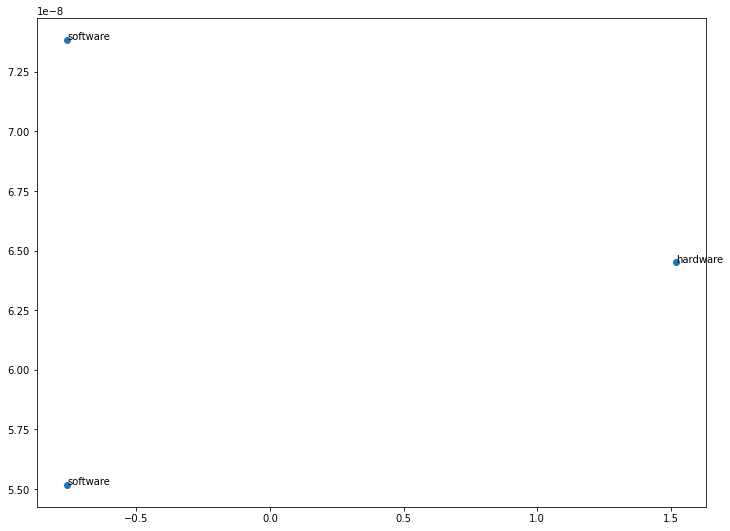

In [186]:
plot_nodes(google_model, terms)

In [115]:
# Generate the average word2vec for the each book description

def vectors(x):
    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []

    # Reading the each book description 
    for line in df['cleaned']:
        avgword2vec = None
        count = 0
        for word in line:
            if word in google_model.wv.vocab:
                count += 1
                if avgword2vec is None:
                    avgword2vec = google_model[word]
                else:
                    avgword2vec = avgword2vec + google_model[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
            word_embeddings.append(avgword2vec)

In [118]:
# Recommending the Top 5 similar books

def recommendations(title):
    
    # Calling the function vectors

    vectors(df)
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(word_embeddings, word_embeddings)

    # taking the title and book image link and store in new data frame called books
    books = df[['title', 'image_link']]
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['title']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():

        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['title'])

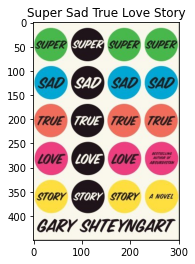

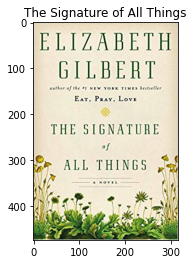

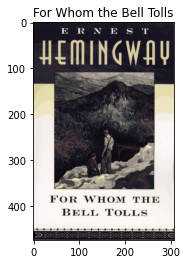

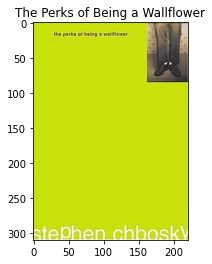

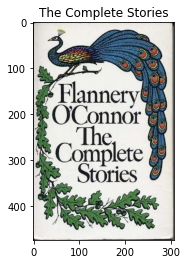

In [147]:
recommendations("The Great Gatsby")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


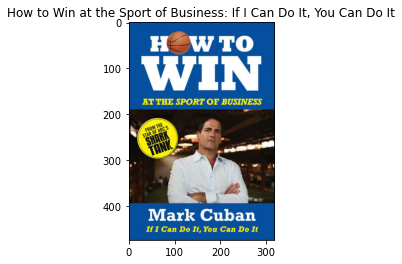

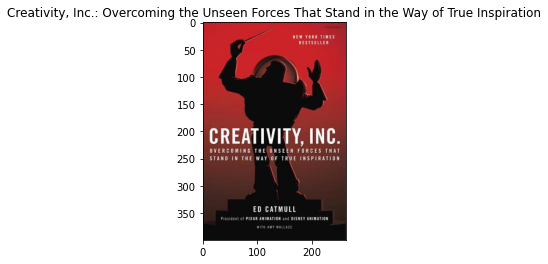

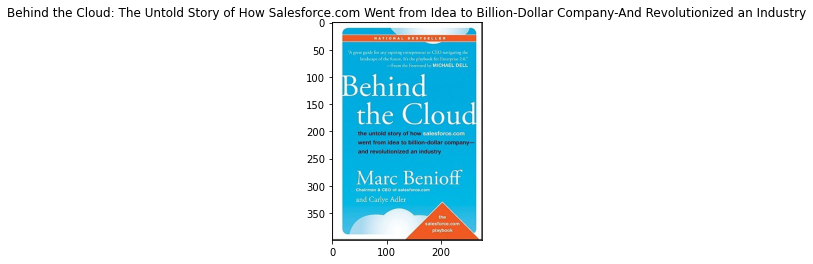

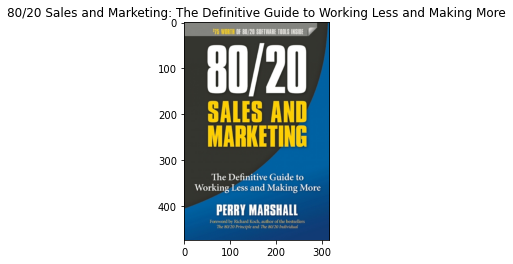

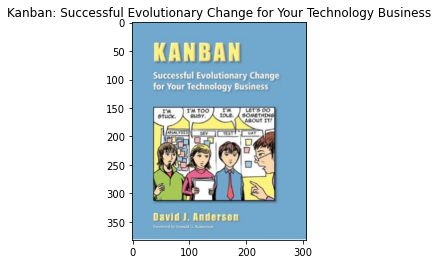

In [120]:
recommendations("Steve Jobs")

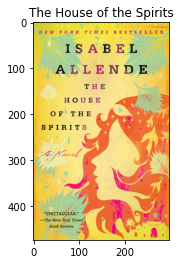

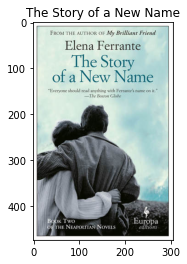

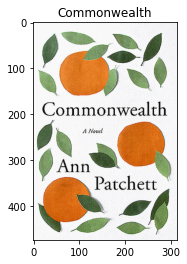

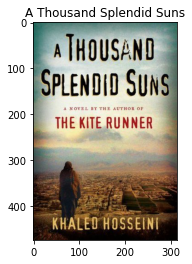

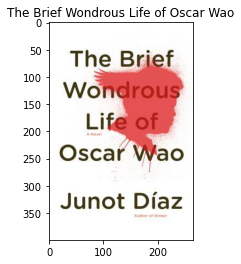

In [150]:
# the last Column
recommendations("The Kite Runner")

### Building TF-IDF Word2Vec Model

In [126]:
#Utitlity functions for removing ASCII characters, converting lower case, removing stop words, html and punctuation from description

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [127]:
df['Desc'] = df['Desc'].astype(str)

df['cleaned'] = df['Desc'].apply(_removeNonAscii)

df['cleaned'] = df.cleaned.apply(func = make_lower_case)
df['cleaned'] = df.cleaned.apply(func = remove_stop_words)
df['cleaned'] = df.cleaned.apply(func=remove_punctuation)
df['cleaned'] = df.cleaned.apply(func=remove_html)

In [128]:
#Building TFIDF model and calculate TFIDF score

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 5, stop_words='english', lowercase=True)
tfidf.fit(df['cleaned'])

# Getting the words from the TF-IDF model

tfidf_list = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_feature = tfidf.get_feature_names() # tfidf words/col-names

In [129]:
# Building TF-IDF Word2Vec 

# Storing the TFIDF Word2Vec embeddings
tfidf_vectors = []; 
line = 0;
# for each book description
for desc in corpus: 
  # Word vectors are of zero length (Used 300 dimensions)
    sent_vec = np.zeros(300) 
    # num of words with a valid vector in the book description
    weight_sum =0; 
    # for each word in the book description
    for word in desc: 
        if word in google_model.wv.vocab and word in tfidf_feature:
            vec = google_model.wv[word]
            tf_idf = tfidf_list[word] * (desc.count(word) / len(desc))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

In [130]:
#Recommending top 5 similar books

def recommendations(title):
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)
    
    # taking the title and book image link and store in new data frame called books
    books = df[['title', 'image_link']]
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['title']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():

        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['title'])

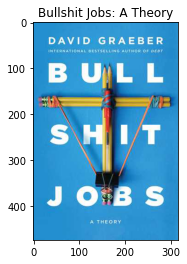

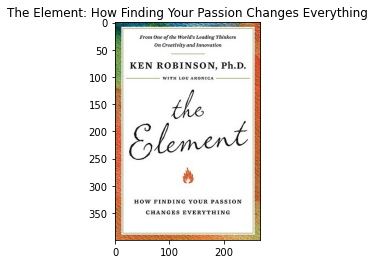

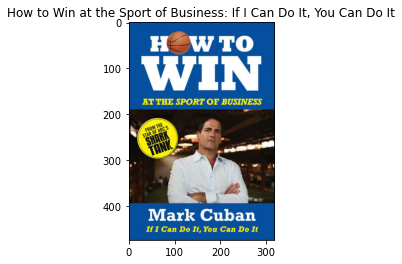

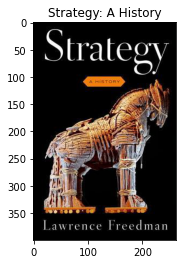

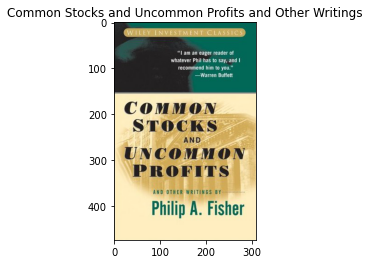

In [146]:
# the last column
recommendations("Steve Jobs")

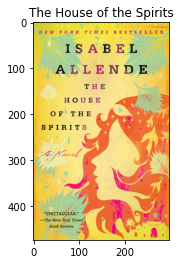

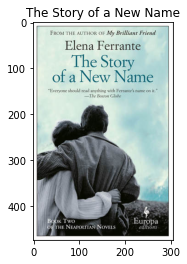

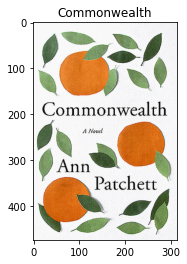

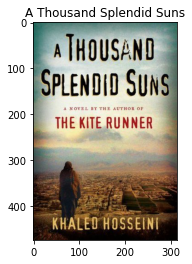

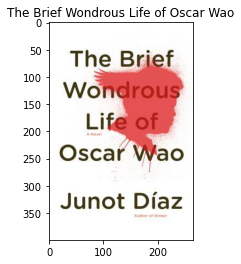

In [148]:
recommendations("The Kite Runner")

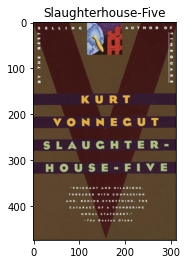

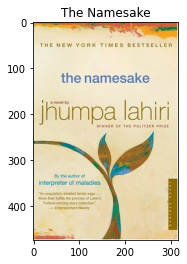

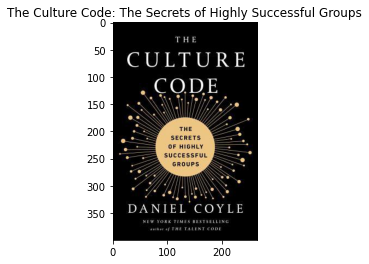

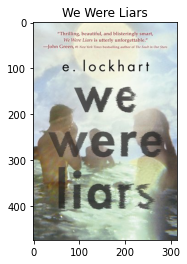

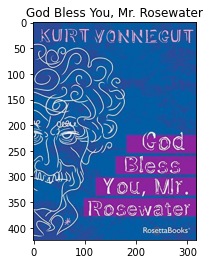

In [149]:
recommendations("Life of Pi")